#[**Presentation link**](https://www.canva.com/design/DAFzBiI-Cbo/FYjpw2YDi7nIvpCB4BZJPQ/edit?utm_content=DAFzBiI-Cbo&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton)

# **1.** Laptop Dataset Documentation

This dataset contains information about over 5800 laptops, including details such as company, model, display specifications, processor information, memory, graphics card, keyboard illumination, and price.

The dataset was compiled from diverse online sources, including manufacturer and retailer websites, as well as review platforms.

The dataset is suitable for research, education, and personal use.

## 1.1 Data Fields

***The dataset comprises the following fields:***

| Field Name         | Data Type | Description                                                     |
|--------------------|-----------|-----------------------------------------------------------------|
| Index              | Integer   | A unique identifier for each laptop in the dataset.             |
| Company            | String    | The laptop manufacturer's name.                                 |
| Model              | String    | The laptop model name.                                          |
| Display Height     | Integer   | Vertical resolution of the laptop display in pixels.            |
| Display Width      | Integer   | Horizontal resolution of the laptop display in pixels.          |
| Display Size       | Float     | Diagonal size of the laptop display in inches.                  |
| Display Quality    | String    | Display quality information (e.g., Full HD, 4K).               |
| Display Type       | String    | Display technology (e.g., IPS, OLED).                           |
| Processor Name     | String    | Name of the laptop's processor (CPU).                           |
| Processor Generation | String   | Processor generation (e.g., Intel Core i5 10th Gen).            |
| Memory             | Integer   | Internal storage capacity of the laptop in GB.                  |
| RAM                | Integer   | RAM (Random Access Memory) capacity of the laptop in GB.        |
| Videocard          | String    | Name of the integrated graphics card.                           |
| Videocard Storage  | String    | Graphics card storage information.                              |
| Illuminated Keyboard | Logical  | Indicates presence of an illuminated keyboard (Yes/No).         |
| Price              | Integer   | Laptop price in a specified currency (e.g., dollars).           |

## 1.2 Laptop Analysis Ideas









Here are some ideas for analyzing the laptop dataset:

- **Summary Statistics:**
  - Compute summary statistics for numerical columns (e.g., Display Height, Display Width, Display Size, Memory, RAM, Price). Include measures such as mean, median, standard deviation, and range.

- **Top Manufacturers and Models:**
  - Identify the most frequent laptop manufacturers and models in the dataset.

- **Display Size vs. Price Analysis:**
  - Visualize the relationship between display size and laptop price using a scatter plot. Determine if larger displays tend to have higher prices.

- **Processor Analysis:**
  - Group data by processor names or generations and calculate average prices, memory, RAM, etc. This analysis offers insights into commonly used processors and their characteristics.

- **Graphics Card Analysis:**
  - Explore the distribution of different graphics cards and their associated memory capacities. Visualize to understand popular graphics card choices.

- **Keyboard Illumination and Price Relationship:**
  - Investigate whether laptops with illuminated keyboards have varying price ranges. Utilize a box plot or bar chart to display this correlation.

- **Correlation Analysis:**
  - Calculate correlations between numerical variables (e.g., Display Size, Memory, RAM, Price) to uncover potential relationships or patterns.

- **Company Market Share:**
  - Calculate each company's market share based on the number of laptop models in the dataset.

# **2.** **Importing** used libraries and **Reading** Dataset from Drive

## 2.1 Imports

In [ ]:
# Imported libraries
from google.colab import data_table
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

## 2.2 Read data from Drive

In [ ]:

# Pandas read data
data = pd.read_csv("https://drive.google.com/uc?export=download&id=1wGZBRqnZeYBRsRpTFTVh1sAlv56s3h2L")
data_table.enable_dataframe_formatter()
data

Output hidden; open in https://colab.research.google.com to view.

# **3.** Data Cleaning

## 3.1 Title-case the ***'Company'*** column values

In [ ]:
# Title-case the 'Company' column values

# for i in range(len(data['Company'])):
#     data['Company'] = data['Company'].str.title()

data['Company'] = data['Company'].str.title()

## 3.2 Multiply ***memory*** values by 1024 for non-null values less than 10

In [ ]:
# Multiply memory values by 1024 for non-null values less than 10

data.loc[(data["Memory"].notna()) & (data['Memory'] < 10), 'Memory'] *= 1024

# Print the value counts of 'Memory' column
print(data["Memory"].value_counts())

512.0     2915
256.0     1614
1024.0     865
128.0      194
2048.0     118
64.0        44
32.0        28
500.0       10
480.0        8
16.0         4
240.0        2
3072.0       2
120.0        2
Name: Memory, dtype: int64


## 3.3 Standardize and replace variations in the ***'Processor Name'*** column

In [ ]:
# Standardize and replace variations in the 'Processor Name' column

data["Processor Name"] = (
    data["Processor Name"]
    .str.lower()
    .str.replace("intel core i5", "core i5")
    .str.replace("intel core i7", "core i7")
    .str.replace("intel core i9", "core i9")
    .str.replace("intel core i3", "core i3")
    .str.replace("amd ryzen 5", "ryzen 5")
    .str.replace("amd ryzen 7", "ryzen 7")
    .str.replace("amd ryzen 3", "ryzen 3")
    .str.replace("amd ryzen 9", "ryzen 9")
    .str.replace("apple m2", "m2")
    .str.replace("apple m1", "m1")
    .str.replace("apple m series", "m series")
    .str.title()
)

# Get value counts of common processors
common_processors = data["Processor Name"].value_counts()

# Print the value counts of 'Processor Name' column
print(common_processors)

Core I5                1814
Core I7                1624
Core I3                 486
Ryzen 5                 470
Ryzen 7                 379
M Series                224
Ryzen 3                 182
Core I9                 163
Intel Pentium           130
Intel Celeron           127
Ryzen 9                  48
M2                       44
M1                       38
Qualcomm Snapdragon      20
Intel                    16
Amd Athlon               16
M1 Pro                    8
Mediatek                  8
Intel Xeon                6
Athlon Gold               4
Amd 3000                  4
M2 Max                    2
M1 Max                    2
Amd A4                    2
Amd A9                    2
Name: Processor Name, dtype: int64


## 3.4 Replace NaN values in the ***'Illuminated keyboard'*** with 0

In [ ]:
# Replace NaN values in the "Illuminated keyboard" with 0
data["Illuminated keyboard"].fillna(0, inplace=True)


## 3.5 Information about dataset, after dataset cleaning

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5827 entries, 0 to 5826
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               5827 non-null   object 
 1   Model                 5469 non-null   object 
 2   Display Height        5751 non-null   float64
 3   Display Width         5751 non-null   float64
 4   Display Size          5785 non-null   float64
 5   Display Quality       648 non-null    object 
 6   Display Type          4532 non-null   object 
 7   Processor Name        5819 non-null   object 
 8   Processor Generation  5819 non-null   object 
 9   Memory                5806 non-null   float64
 10  Ram                   5813 non-null   float64
 11  Videocard             5692 non-null   object 
 12  Videocard Storage     1391 non-null   float64
 13  Illuminated keyboard  5827 non-null   float64
 14  Price                 5780 non-null   float64
 15  Website index        

# **4.** Data Analysis


## 4.1 Calculate the average price of laptops for each company with animation

### 4.1.1 **Visualization**

In [ ]:
plt.style.use('seaborn-v0_8-whitegrid')

# Calculate the average price of laptops for each company
notebook_mean = data.groupby('Company')['Price'].mean()
# Set up the initial plot
fig, ax = plt.subplots(figsize=(12, 9))

# Main histogram plot
cmap = plt.cm.viridis
normalize = Normalize(vmin=min(notebook_mean.values), vmax=max(notebook_mean.values))
# colors = [cmap(normalize(value)) for value in notebook_mean.values]
colors = [cmap(i / len(notebook_mean)) for i in range(len(notebook_mean))]
bars = ax.bar(notebook_mean.index, notebook_mean.values, color = colors)
ax.set_xlabel('Companies')
ax.set_ylabel('Price Mean')
ax.set_title('Average price of laptops by manufacturers')
ax.set_xticks(np.arange(len(notebook_mean)))
ax.set_xticklabels(notebook_mean.index, rotation=45, ha='right')
ax.set_yticks(np.linspace(0, 3000000, 6, endpoint=True))
ax.set_yticklabels((np.linspace(0, 3000000, 6, endpoint=True)).astype('uint64'))

# Legends plot
indices = np.where(notebook_mean.values > 1e6)
top_company_names = notebook_mean.index[indices]
value_c = data['Company'].value_counts()
legend_colors = [cmap(normalize(value)) for value in notebook_mean.values[indices]]

# Create a legend with synced colors
legend_labels = notebook_mean.index[indices]
sm = ScalarMappable(cmap=cmap, norm=normalize)
sm.set_array([])  # Dummy empty array for the ScalarMappable
legend = ax.legend(handles=[plt.Line2D([0], [0], color='b', label=f'{label[0]} {label[1]}', marker = 'o', markersize=6) for label in zip(top_company_names, value_c.loc[top_company_names])],
                  title='Company - Notebooks count',
                  shadow = True,
                  labelcolor = 'b',
                  loc='upper left')

# Hide the legend title
legend.set_title(None)

plt.tight_layout();

# Function to update the plot for each frame of the animation
def update(frame):
    # Simulate changing data (replace this with your actual data updates)
    new_prices = (notebook_mean.values // 50) * frame
    for bar, new_price in zip(bars, new_prices):
        bar.set_height(new_price)

# Create the animation
animation = FuncAnimation(fig, update, frames=range(0, 51), interval=50)
plt.close()
# Generate the HTML for the animation without control buttons
HTML(animation.to_jshtml())


Output hidden; open in https://colab.research.google.com to view.

### 4.1.1  **Analysis**

* ***Razer*** stands out with the highest average laptop price, which is around ***2.500.000 ֏.*** This could be attributed to Razer’s premium branding and the high-end specifications of their laptops.

----

* On the other end of the spectrum, ***Lc-Power*** offers laptops at the lowest average price of approximately ***300.000 ֏***. This suggests that ***Lc-Power*** might be targeting a different market segment, possibly focusing on affordability.

----

* Other manufacturers like Microsoft, Toshiba, HP, Panasonic, and Samsung fall somewhere in between, with their average laptop prices distributed across a range from ***300.000 ֏ to 2.500.000 ֏***.

----

      This graph can be useful for potential laptop buyers to get an idea of
      the price ranges offered by different manufacturers. However, it’s
      important to note that these are average prices and individual laptop
      models may vary significantly in price based on their specifications and
      features.

## 4.2 Calculate the percent of each company in the "Company" column

### 4.2.1 **Visualization**

In [ ]:
# Calculate the percent of each company in the "Company" column
company_counts = data['Company'].value_counts()

# Keep the top 5 companies and group others into 'Other'
top_companies = company_counts[:10]
other_count = company_counts[10:].sum()
top_companies['Other'] = other_count

explode = [0.1 if i == 0 else 0 for i in range(len(top_companies))]
colors = plt.cm.Set3.colors

# Set up the initial plot
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(top_companies, labels=top_companies.index, autopct='%1.1f%%', startangle=140, explode=explode, colors=colors)
ax.set_title('Distribution of Top Laptop Manufacturers')
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.tight_layout()

# Function to update the plot for each frame of the animation
def update(frame):
    # Simulate changing data (replace this with your actual data updates)
    new_explode = [0.1 if i == frame else 0 for i in range(len(top_companies))]

    # Update the explode values
    for i, new_expl in enumerate(new_explode):
        explode[i] = new_expl

    # Replot the pie chart with updated explode values
    ax.clear()
    wedges, texts, autotexts = ax.pie(top_companies, labels=top_companies.index, autopct='%1.1f%%', startangle=140, explode=explode, colors=colors)
    ax.set_title('Distribution of Top Laptop Manufacturers')
    ax.axis('equal')
    plt.tight_layout()

# Create the animation
animation = FuncAnimation(fig, update, frames=range(len(top_companies)), interval=1000, repeat=False)

# Clear the initial plot to avoid displaying it before the animation
plt.close()

# Display the animation in Google Colab
HTML(animation.to_jshtml())

<Figure size 640x480 with 0 Axes>

### 4.2.2 **Analysis**

- **HP** dominates the market with the largest share at 19.3%, represented by the light blue section on the chart.

---

- **Lenovo** follows closely as the second-largest manufacturer with an 18.0% share, depicted by the green section.

---

- Lastly, **Fujitsu** holds a small share of 1.9%, depicted in the dark purple section.

---

      This chart offers a comprehensive view of the laptop market, illustrating
      the distribution of market shares among the top manufacturers. Notably,
      despite the higher average price of their laptops, ✅Razer holds a
      relatively smaller market share compared to giants like HP and Lenovo.


## 4.3 Calculate the count of each Procesor in the "Processor Name" column

### 4.3.1 **Visualization**

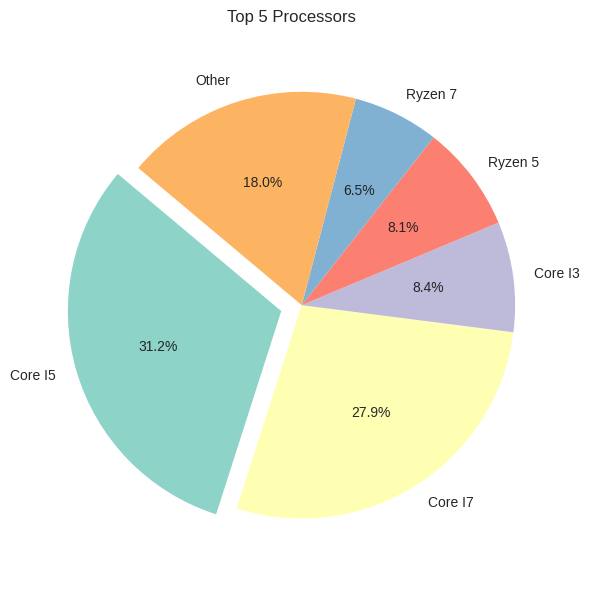

In [ ]:
# Calculate the count of each Procesor in the "Processor Name" column
processor_counts = data['Processor Name'].value_counts()

# Keep the top 5 companies and group others into 'Other'
top_companies = processor_counts[:5]
other_count = processor_counts[5:].sum()
top_companies['Other'] = other_count

explode = [0.1 if i == 0 else 0 for i in range(len(top_companies))]
colors = plt.cm.Set3.colors

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(top_companies, labels=top_companies.index, autopct='%1.1f%%', startangle=140,colors=colors,explode=explode)
plt.title('Top 5 Processors')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.tight_layout()
plt.show()

### 4.3.2 **Analysis**

* **Core i5** is the most common processor, making up **31.2%** of dataset.

---

* **Core i7** is the second most common, representing **27.9%** of the data.

---

* **Core i3** and **Ryzen 5** are less common, representing **8.4%** and **8.1%** respectively.

---

      This distribution shows that Core i5 and Core i7 processors are
      the most prevalent in our dataset. The **"Other"** category also
      constitutes a significant portion, which might include a variety
      of other processors not listed in the top 5.

## 4.4 Price Mean **Dependence from** Display Type

### 4.4.1 **Visualization**

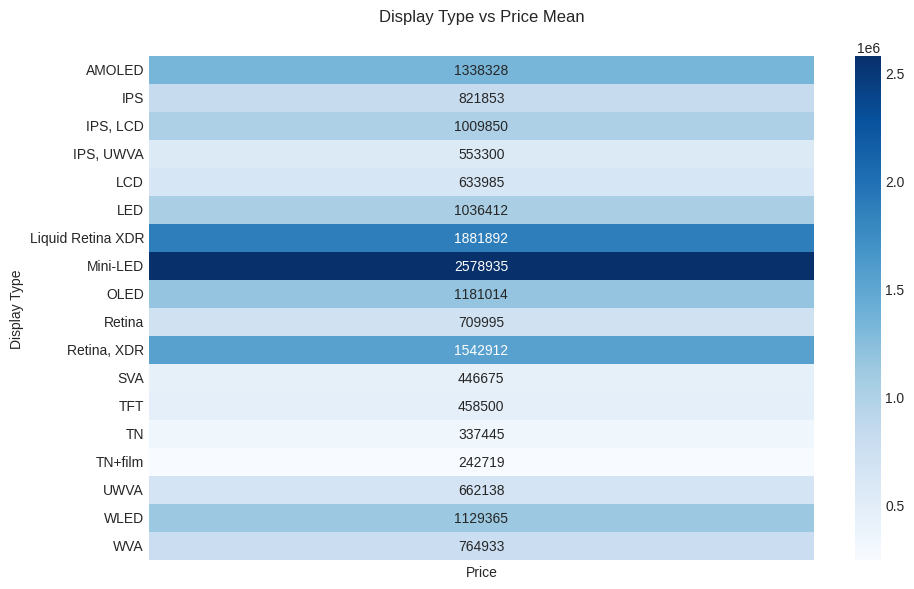

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.pivot_table(index='Display Type', values='Price', aggfunc='mean').round(), cmap='Blues', annot=True, fmt='.0f',)
# plt.xlabel('Display Type')
plt.title('Display Type vs Price Mean', pad='25')
plt.xticks()
plt.tight_layout()
plt.show()


### 4.4.2 **Analysis**

Display Technology Mean Prices

This bar graph illustrates the mean prices of various types of display technologies for electronic devices.

---

- **Mini-LED** stands out as the display technology with the highest mean price, boasting an average price.

- In contrast, **TN+film** displays represent the lowest end of the spectrum, with a mean price.

- Other popular display technologies such as **AMOLED**, **IPS**, **LCD**, **Liquid Retina**, **Retina, XDR**, **OLED**, **Retina**, **TFT**, **TN**, and **UWVA** exhibit a range of mean prices spanning between these two extremes.

---

This graph serves as a valuable comparative tool for consumers, allowing them to assess both the display quality and cost when considering the purchase of electronic devices. However, it's essential to keep in mind that these are average prices, and the actual cost of a specific model may vary significantly depending on factors like size, resolution, and additional features.

## 4.5 Top 3 counted values for each column

### 4.5.1 **Visualization**

In [ ]:
data.mode()

,Company,Model,Display Height,Display Width,Display Size,Display Quality,Display Type,Processor Name,Processor Generation,Memory,Ram,Videocard,Videocard Storage,Illuminated keyboard,Price,Website index
0,Hp,Aspire 3,1080.0,1920.0,15.6,FullHD,IPS,Core I5,1235U,512.0,16.0,Intel Iris Xe Graphics,4.0,0.0,345000.0,4


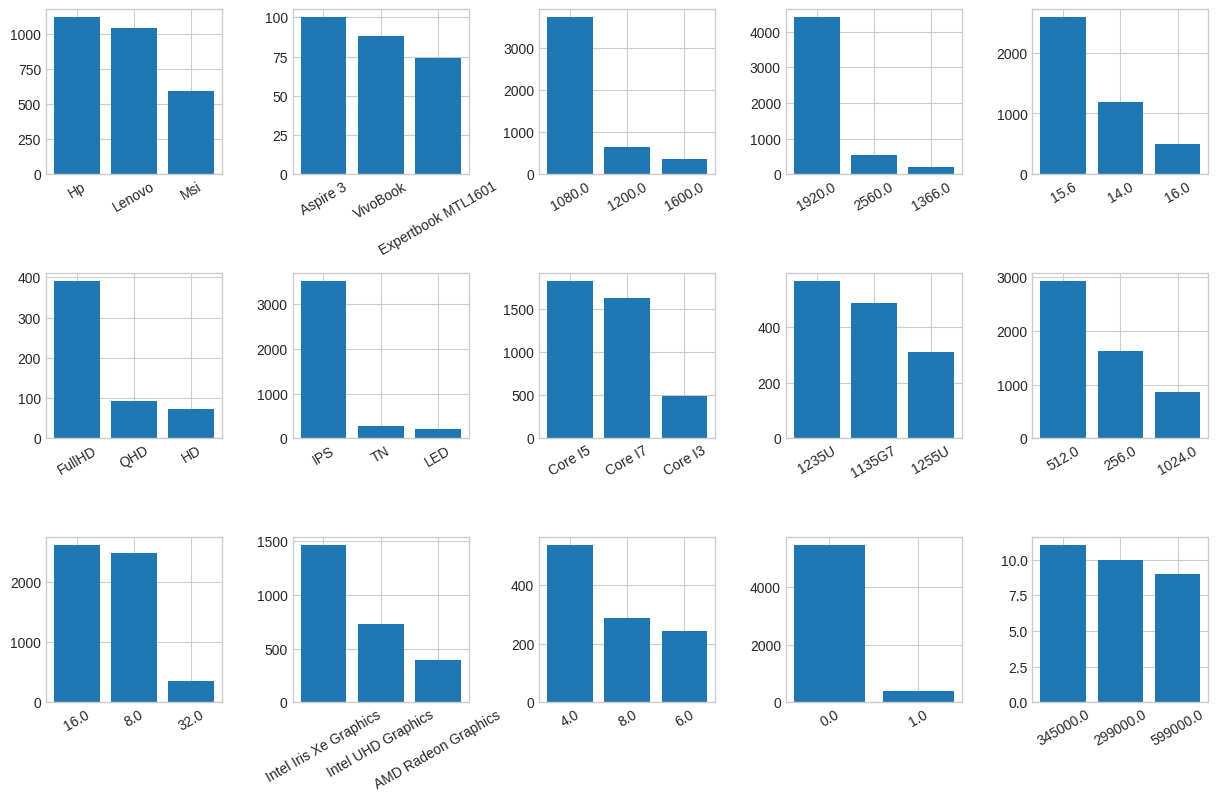

In [ ]:
fig = plt.figure(figsize=(15, 9))
fig.subplots_adjust(hspace=0.6, wspace=0.4)
for i in range(1, 16):
  plt.subplot(3,5,i)
  plt.bar(data[data.columns[i-1]].value_counts().iloc[:3].index.astype(str), data[data.columns[i-1]].value_counts().iloc[:3].values)
  plt.xticks(rotation=30)


### 4.5.2 **Analysis**

* The most common laptops is **HP**

---

* The most common laptop Model is **Aspire 3**

---

* The most counted display Quality is **Full HD** & display type is **IPS**

---

* The most common display size is **15.6**

---

* The most common laptops Doesn't have an **Discrete video card**, but have some integrated alternatives.

---

      This chart shows us that the most common laptop company
      in our Dataset is **HP**, despite this The most counted value of
      laptop model is Acer's **Aspire 3** which shows that many **Hp**
      laptop models doesn't exist, also it shows that about an **2500**
      laptops does not have discrete video cards.

## 4.6 The most Expensive and the Cheapest laptops

In [ ]:
# The most Expensive and the Cheapest laptops
most_expensive_laptop = data[data['Price'] == data['Price'].max()]
cheapest_laptop = data[data['Price'] == data['Price'].min()]

### 4.6.1 The most Expensive

In [ ]:
most_expensive_laptop

,Company,Model,Display Height,Display Width,Display Size,Display Quality,Display Type,Processor Name,Processor Generation,Memory,Ram,Videocard,Videocard Storage,Illuminated keyboard,Price,Website index
2375,Lenovo,ThinkPad P1 Gen 5,2400.0,3840.0,16.0,NaN,IPS,Core I9,12900H,1024.0,32.0,RTX A5500,16.0,0.0,6116800.0,2


### 4.6.2 The Cheapest

In [ ]:
cheapest_laptop

,Company,Model,Display Height,Display Width,Display Size,Display Quality,Display Type,Processor Name,Processor Generation,Memory,Ram,Videocard,Videocard Storage,Illuminated keyboard,Price,Website index
63,Dell,Latitude 3190,768.0,1366.0,11.6,HD,NaN,Intel,N4120,128.0,4.0,Intel UHD Graphics 600,NaN,0.0,88000.0,3
262,Dell,Latitude,768.0,1366.0,11.6,HD,NaN,Intel,N4120,128.0,4.0,Intel UHD Graphics 600,NaN,0.0,88000.0,1


## 4.7 Missing Values Count for each website

### 4.7.1 **Visualization**

In [ ]:
# Nan Counts
null_count = data.isnull().sum()
print(null_count)

Company                    0
Model                    358
Display Height            76
Display Width             76
Display Size              42
Display Quality         5179
Display Type            1295
Processor Name             8
Processor Generation       8
Memory                    21
Ram                       14
Videocard                135
Videocard Storage       4436
Illuminated keyboard       0
Price                     47
Website index              0
dtype: int64


In [ ]:
notebook_centre_nan_count = data[data["Website index"] == 1].isnull().sum()
nout_nan_count = data[data["Website index"] == 2].isnull().sum()
buy_laptop_nan_count = data[data["Website index"] == 3].isnull().sum()

notebook_centre_nan_count_percent =  data[data["Website index"] == 1].isnull().sum() * 100 /  (data['Website index'] == 1).sum()
nout_nan_count_percent =  data[data["Website index"] == 2].isnull().sum() * 100 /  (data['Website index'] == 2).sum()
buy_laptop_nan_count_percent =  data[data["Website index"] == 3].isnull().sum() * 100 /  (data['Website index'] == 3).sum()


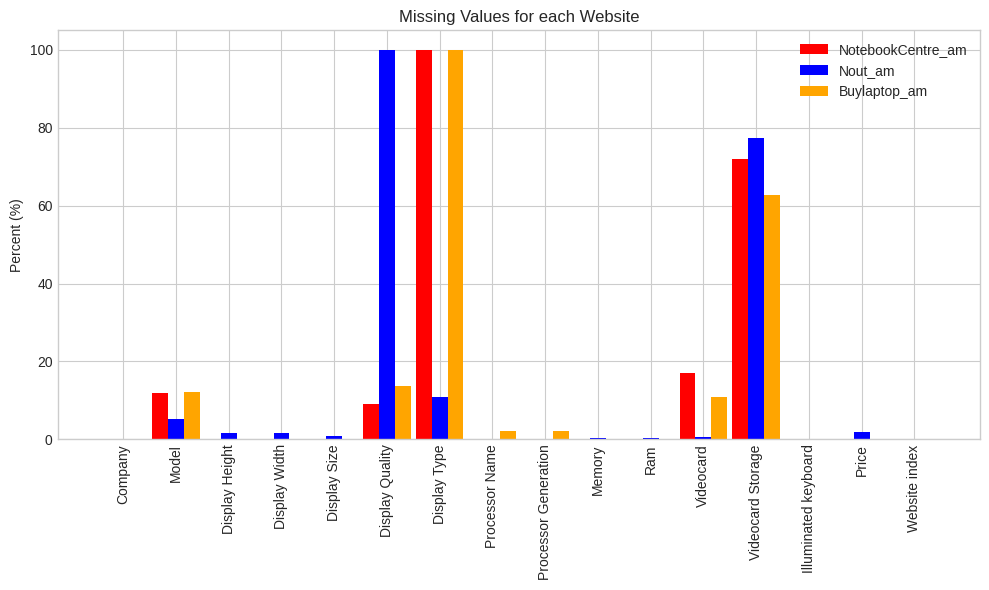

In [ ]:
x = np.arange(len(notebook_centre_nan_count_percent.index))
# Bar width for each group
bar_width = 0.3

# Create grouped bar chart
plt.figure(figsize=(10, 6))
plt.bar(x - bar_width, notebook_centre_nan_count_percent.values, bar_width, label='NotebookCentre_am', color='red')
plt.bar(x, nout_nan_count_percent.values, bar_width, label='Nout_am', color='blue')
plt.bar(x + bar_width, buy_laptop_nan_count_percent.values, bar_width, label='Buylaptop_am', color='orange')

plt.xticks(x, notebook_centre_nan_count.index, rotation=90)
# plt.xlabel('Columns')
plt.ylabel('Percent (%)')
plt.title('Missing Values for each Website')
plt.legend(loc='upper right')
plt.tight_layout()

plt.show()

### 4.7.2 **Analysis**

* The Huge percent of all **Nan** values are in **Nout_am** dataset more then **2500** nan values for some columns

---

* The least number of **Nan** values are in **Notebook_Centre_am** datast,  maximum nan values for column are less than **160**

---

      In case that Nan Value in the Display Quality or Video Card
      Storage column(integrated video cards doesn't have storage with
      all websites) may be normal, In Nout.am Dataset Sometimes Price
      alce is Nan.

## 4.8 Correlation Chart

### 4.8.1 **Visualization**

<ipython-input-26-8db04f73e0d9>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr();


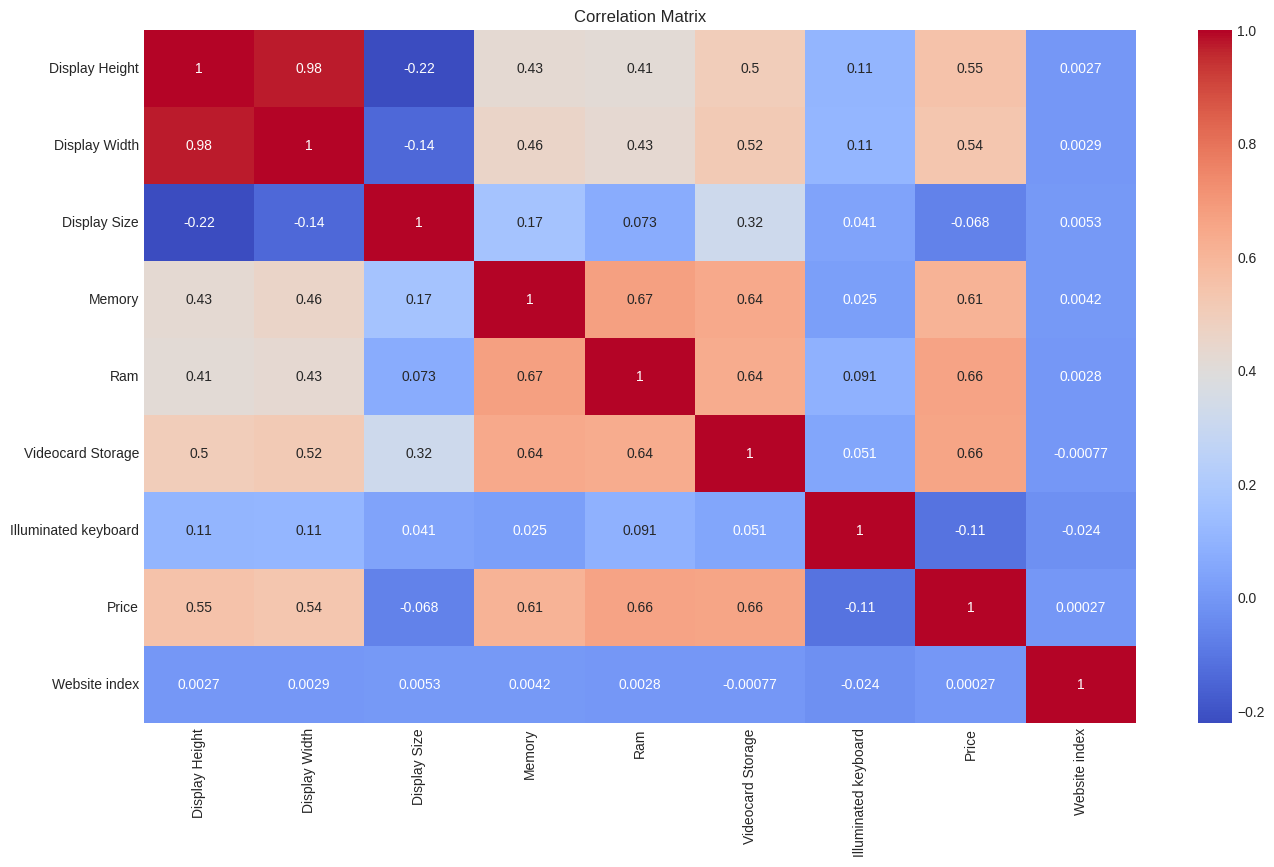

In [ ]:
# Correlation Analysis
plt.figure(figsize=(16,9))
correlation_matrix = data.corr();
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm');
plt.title('Correlation Matrix')
plt.show()


### 4.8.2 **Analysis**

 * This chart is useful for identifying patterns and **relationships** between different variables.

 ---

 * It shows that Price is most influenced by Memory, Ram, Video Card Storage.

 ---

 * Display Height has a strong positive correlation of 0.98 with Display Width but a weak negative correlation of -0.22 with Display Size.